Com base nesses dados, você precisa agrupar os clientes em clusters com base em
seu comportamento de compra. Isso irá permitir identificar padrões e características em comum entre os clientes, como:

- Clientes que compram os mesmos produtos;
- Clientes que possuem a mesma frequência de compras;
- Clientes que gastam mais dinheiro em suas compras.

In [ ]:
# Definição de RFM
# https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp

# Base de dados
- https://s3-us-west-2.amazonaws.com/secure.notion-static.come73c934e-cd3a-4e00-85f6-b704762fec77/data.csv
- https://www.kaggle.com/datasets/carrie1/ecommerce-data


In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import pygwalker as pyg

from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Importando base de dados
df = pd.read_csv ('/content/drive/MyDrive/Planilhas - Ciência de Dados/desafio_7_DNC.csv', encoding = 'latin1')

# Etapa 01: Análise exploratória e limpeza dos dados

In [ ]:
# Visualizando as informações iniciais
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Formato dos dados
print (df.shape)

(541909, 8)


In [ ]:
# Colunas dos dados
print (df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
# Tipo de data MM/DD/YYYY HH:mm:ss
pd.to_datetime (df.InvoiceDate)

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [ ]:
# Comprimento das datas
comprimento_datas = df.InvoiceDate.str.len()

comprimento_datas.value_counts()

InvoiceDate
15    301446
16    118449
14    114913
13      7101
Name: count, dtype: int64

In [ ]:
# Deixando na forma YYYY/MM/DD
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")
df["Invoice_Date"] = df["InvoiceDate"].dt.strftime("%m/%d/%Y")
df["Invoice_Time"] = df["InvoiceDate"].dt.strftime("%H:%M")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12/01/2010,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12/01/2010,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/01/2010,08:26


In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [ ]:
# Descrição dos dados (observar números negativos em 'Quantity' e 'UnitPrice'
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# Soma dos nulos
df.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
Invoice_Date         0
Invoice_Time         0
dtype: int64

In [ ]:
# Soma dos duplicados
df.duplicated().sum()

5268

In [ ]:
# Soma de dados únicos
for column in df.columns:
    print(f'O número de dados únicos na coluna {column} é: {df[column].nunique()}')

O número de dados únicos na coluna InvoiceNo é: 25900
O número de dados únicos na coluna StockCode é: 4070
O número de dados únicos na coluna Description é: 4223
O número de dados únicos na coluna Quantity é: 722
O número de dados únicos na coluna InvoiceDate é: 23260
O número de dados únicos na coluna UnitPrice é: 1630
O número de dados únicos na coluna CustomerID é: 4372
O número de dados únicos na coluna Country é: 38
O número de dados únicos na coluna Invoice_Date é: 305
O número de dados únicos na coluna Invoice_Time é: 774


In [ ]:
# Avaliando os valores únicos de 'Country'
uni_country = df['Country'].unique()

uni_country = sorted(uni_country)

print(uni_country)

['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']


In [ ]:
# Identificar quantos valores duplicados há em cada linha
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(5)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate         UnitPrice CustomerID Country        Invoice_Date Invoice_Time              
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        2011-06-05 11:37:00 2.95      16923.0    United Kingdom 06/05/2011   11:37                   20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        2011-06-05 11:37:00 2.95      16923.0    United Kingdom 06/05/2011   11:37                   12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       2011-10-26 12:46:00 1.25      14102.0    United Kingdom 10/26/2011   12:46                    8
541266    21755     LOVE BUILDING BLOCK WORD            1        2011-01-16 16:25:00 5.95      15673.0    United Kingdom 01/16/2011   16:25                    6
572344    M         Manual                              48       2011-10-24 10:43:00 1.50      14607.0    United Kingdom 10/24/2011   10:43                    6

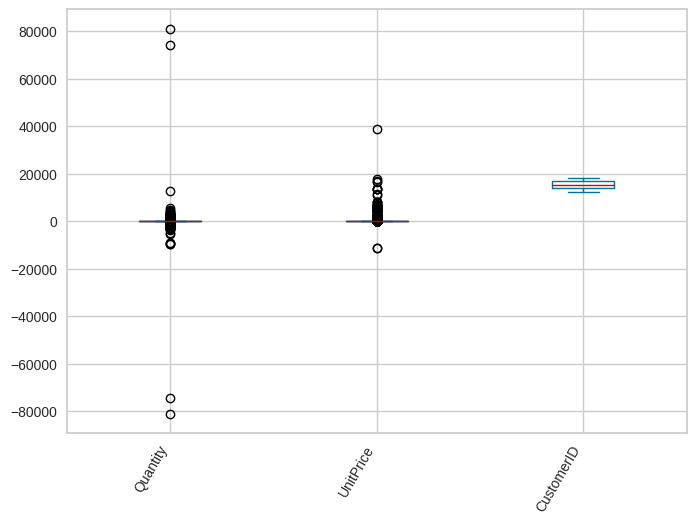

In [ ]:
# Boxplot dos dados numéricos
# Observa-se valores negativos em 'Quantity' e 'UnitPrice'
df.plot.box()

plt.xticks (rotation = 60, ha = 'right');

In [ ]:
# Realizando uma função onde se retorna se o valor é ou não outlier
def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [ ]:
# Verificação de outliers - calculando outliers na coluna 'Quantity'
is_outlier(df.Quantity).sum()

58619

In [ ]:
# Verificação de outliers - calculando outliers na coluna 'UnitPrice'
is_outlier(df.UnitPrice).sum()

39627

In [ ]:
# Analisando se existem valores negativos
print(df["Quantity"].min())
print(df["UnitPrice"].min())

-80995
-11062.06


In [ ]:
# Retirando os dados negativos da coluna 'Quantity'
sem_neg = df ['Quantity'] < 0
print(df[sem_neg])
print('before:', df.shape)

df = df[~sem_neg]
print('after:', df.shape)

"""# Outra forma de retirar os dados negativos
df = raw_df.loc[raw_df["Quantity"] >0 ]
df = df.loc[df["UnitPrice"] >0 ]"""

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  \
141    2010-12-01 09:41:00      27.50     

'# Outra forma de retirar os dados negativos\ndf = raw_df.loc[raw_df["Quantity"] >0 ]\ndf = df.loc[df["UnitPrice"] >0 ]'

In [ ]:
# Retirando os dados negativos da coluna 'UnitPrice'
sem_neg = df ['UnitPrice'] < 0
print(df[sem_neg])
print('before:', df.shape)

df = df[~sem_neg]
print('after:', df.shape)

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country Invoice_Date Invoice_Time  
299983  -11062.06         NaN  United Kingdom   08/12/2011        14:51  
299984  -11062.06         NaN  United Kingdom   08/12/2011        14:52  
before: (531285, 10)
after: (531283, 10)


In [ ]:
# Verificando se foram retirados os valores negativos
print(df["Quantity"].min())
print(df["UnitPrice"].min())

1
0.0


In [ ]:
# Trocando vírgula por ponto no df
df["UnitPrice"] = df["UnitPrice"].replace(",", ".")

# Etapa 02: Pré-processamento

In [ ]:
# Função para verificar valores nulos ocultos
df.loc[df.Description.isnull()==False, "lowercase_descriptions"] = df.loc[
    df.Description.isnull()==False,"Description"
].apply(lambda l: l.lower())

df.lowercase_descriptions.dropna().apply(
    lambda l: np.where("nan" in l, True, False)
).value_counts()

lowercase_descriptions
False    529969
True        722
Name: count, dtype: int64

In [ ]:
# Dropando os dados nulos
df.dropna (axis = 0, inplace=True)

In [ ]:
# Dropando os dados duplicados
df.drop_duplicates

<bound method DataFrame.drop_duplicates of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

       Invoice_Date Invoice_Time               lowercase_descriptions  
0        12/01/2010        08:26   white hanging heart t-light holder  
1        12/01/2010        08:26                  white metal lantern  
2        12/01/2010        08:26       cream cupid hearts coat hanger  
3        12/01/2010        08:26  knitted union flag hot water bottle  
4        12/01/2010        08:26       red woolly hottie white heart.  
...             ...          ...                                  ...  
541904   12/09/2011        12:50          pack of 20 spaceboy napkins  
541905   12/09/2011        12:50         children's apron dolly girl   
541906   12/09/2011        12:50        childrens cutlery dolly girl   
541907   12/09/2011        12:50      childrens cutlery circus parade  
541908   12/09/2011        12:50        baking set 9 piece retrospot   

[397924 rows x 11 columns]>

In [ ]:
# Colocando o dia de hoje como se fosse 2011-12-01
dia_hoje = dt.datetime(2011, 12, 1)

In [ ]:
# Adicionando coluna de Preço Total no df
df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]

In [ ]:
# Realizando o agrupamento para preparar o clustering
df_clustering = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (dia_hoje - InvoiceDate.max()).days,
                                     'InvoiceNo'    : 'nunique',
                                     'TotalPrice' : 'sum'})

df_clustering.columns = ['recency', 'frequency', 'monetary']

In [ ]:
# Realizando a normalização dos dados
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_clustering)

df_scaled = pd.DataFrame(df_scaled,columns=['recency', 'frequency', 'monetary'])

df_scaled["CustomerID"] = df_clustering.index

df_scaled = df_scaled.set_index("CustomerID",drop=True)

In [ ]:
# Verificando o df
df_scaled.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,2.329673,-0.424675,8.359634
12347.0,-0.900449,0.354080,0.251046
12348.0,-0.170421,-0.035297,-0.028546
12349.0,-0.740443,-0.424675,-0.032963
12350.0,2.179667,-0.424675,-0.191315


# Etapa 03: Selecionando um algoritmo de clusterização

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

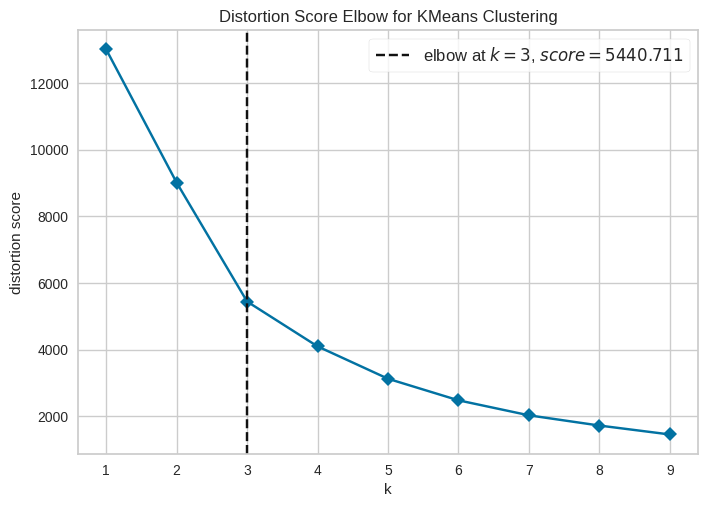

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Utilizado o modelo de cotovelo (K-Means)
model = KMeans()

visualizando = KElbowVisualizer (model, k=(1, 10), timings = False)

visualizando.fit(df_scaled)

visualizando.show()

In [ ]:
# Setando o número de clusters de 3 como indicou na figura
kmeans = KMeans(n_clusters = 3, n_init = 15, random_state = 1)

kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=1)

In [ ]:
# Definindo os centroides
centroids = kmeans.cluster_centers_

centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [ ]:
# Visualizando os centroides
centroid_df

,recency,frequency,monetary
0,-0.865832,8.076735,9.329985
1,1.540867,-0.349211,-0.158234
2,-0.512217,0.052572,-0.021878


In [ ]:
# Setando os rótulos do K-means
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [ ]:
# Clusterizando
df_kmeans = df_clustering.copy()

df_kmeans['labels'] = df_labels['labels'].values

# Etapa 04: Analise os clusters obtidos

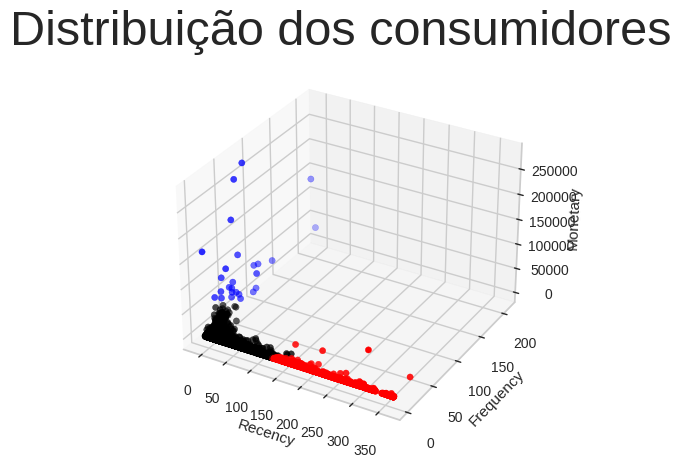

In [ ]:
# Data-visualização para analisar padrões e características em separado junto com o respectivo RFM
cores = np.array (["blue", "red", "black"])

fig  = plt.figure(figsize = (5,5)).suptitle('Distribuição dos consumidores', fontsize = 35)

ax = plt.axes(projection='3d')

ax.scatter3D (df_kmeans["recency"], df_kmeans["frequency"], df_kmeans["monetary"], marker='o', c=cores[df_kmeans["labels"].tolist()])

ax.set_xlabel('Recency')

ax.set_ylabel('Frequency')

ax.set_zlabel('Monetary')

plt.legend()

plt.show()

# Etapa 05: Interpretação dos resultados obtidos

In [ ]:
# Agregação dos resultados
agg_list = ["mean", "count", "max",]

df_kmeans[["labels", "recency", "frequency", "monetary"]].groupby("labels").agg(agg_list)

recency             frequency                 monetary        \
              mean count  max       mean count  max          mean count   
labels                                                                    
0        -3.538462    26   29  66.500000    26  210  85904.351538    26   
1       237.122355  1087  364   1.581417  1087   34    631.706220  1087   
2        31.821761  3226  154   4.676999  3226   55   1857.169902  3226   

                   
              max  
labels             
0       280206.02  
1        77183.60  
2        50491.81

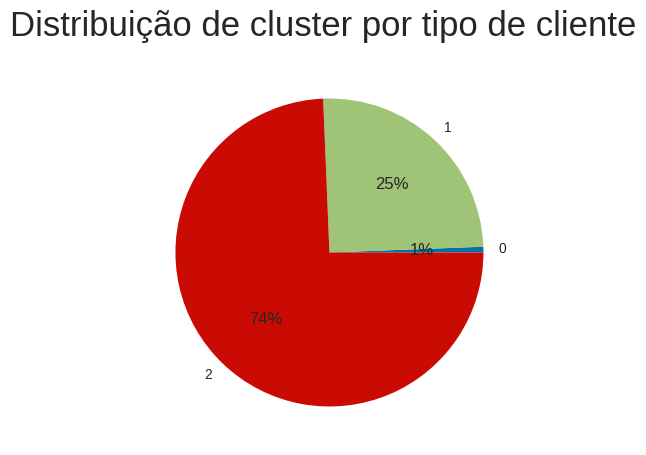

In [ ]:
# Distribuição dos clientes para interpretação
df_kmeans = df_kmeans.reset_index()

clusters_count = df_kmeans.groupby("labels").agg({"CustomerID": "count"})

clusters_count.reset_index(inplace=True)

clusters_count.columns = ['cluster', 'count']

fig  = plt.figure(figsize = (5,5)).suptitle('Distribuição de cluster por tipo de cliente', fontsize=25)

plt.pie(clusters_count["count"], labels = clusters_count["cluster"], autopct='%.0f%%')

plt.show()

# Intepretação final do case

Pela clusterização, obteve-se 3 tipos diferentes de clientes, com diferentes comportamentos.

- Cliente tipo 0: Clientes tipo **"excepcionais"**, pois compram com maior frequência, mais recentes e que gastam a maior quantidade de dinheiro.
- Cliente tipo 1: Clientes **"adormecidos"**, clientes que compram com menor frequência, menos recentemente e que gastam menos dinheiro.
- Cliente tipo 2: Clientes **"pontuais"** que compram mais pontualmente os itens no site